In [1]:
#import libraries
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from tensorflow import keras
import os
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
test_path = pathlib.Path(r'C:\Users\Agung\Desktop\Depus_project\tugas\tfserving_p2m2\dataset')

In [5]:
sample_path = pathlib.Path(r'C:\Users\Agung\Desktop\Depus_project\tugas\tfserving_p2m2\dataset\mask\maskeron.jpg')

(-0.5, 649.5, 432.5, -0.5)

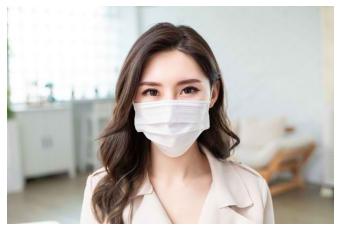

In [6]:
img = mpimg.imread(sample_path)
plt.imshow(img)
plt.axis("off")

In [8]:
new_data_datagen = ImageDataGenerator(rescale=1/255.0)

In [11]:
new_data = new_data_datagen.flow_from_directory(test_path,
                                               class_mode='categorical',
                                               target_size=(224, 224),
                                               shuffle = False)

Found 4 images belonging to 2 classes.


In [13]:
new_data.color_mode

'rgb'

In [23]:
new_data.filenames

['mask\\maskeron.jpg',
 'mask\\maskeron2.jpg',
 'non_mask\\nonmask.jpg',
 'non_mask\\nonmask2.jpg']

In [34]:
new_data.labels

array([0, 0, 1, 1])

In [46]:
new_data.seed

In [54]:
new_data.subset

In [61]:
new_data.white_list_formats

('png', 'jpg', 'jpeg', 'bmp', 'ppm', 'tif', 'tiff')

In [62]:
def load_prep_img(filename, img_shape=224):
  
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img


In [64]:
new_data = load_prep_img(r'C:\Users\Agung\Desktop\Depus_project\tugas\tfserving_p2m2\dataset\mask\maskeron.jpg',img_shape=224)

In [65]:
image_tensor = tf.expand_dims(new_data, 0)
image_tensor = image_tensor.numpy().tolist()


In [68]:
import json
import requests

input_data_json = json.dumps({
    'signature_name':'serving_default',
    'instances':image_tensor
})


In [71]:
URL = "https://p2m2-ftds12-gusti-ayu-dewi-be.herokuapp.com/v1/models/mask_detection:predict"

r=requests.post(URL,data= input_data_json)

res=r.json()
# res['predictions'][0]
res


{'predictions': [[0.984248698, 0.0157513209]]}

In [75]:
list = ['Mask','Non Mask']

In [76]:
import numpy as np

list[np.array(res['predictions'][0]).argmax()]


'Mask'